<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [20]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [22]:
data = pd.read_csv('./train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [23]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

1) заменяю пропуски в данных на np.nan

2) меняю тип столбца TotalSpent с object на float

3) очищаю датасет от пустых данных

In [24]:
# Для вашего удобства списки с именами разных колонок
data = data.replace(' ', np.nan)
data['TotalSpent'] = data['TotalSpent'].astype(float)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

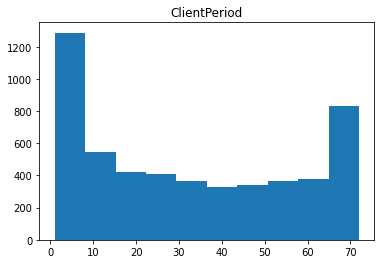

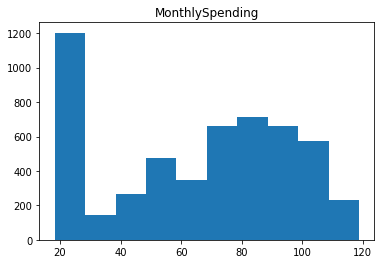

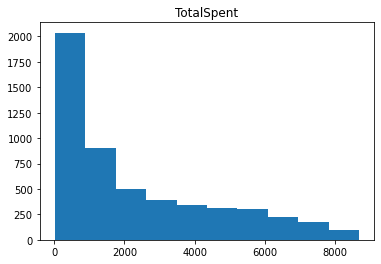

In [25]:
for col in num_cols:
  plt.hist(data[col])
  plt.title(col)
  plt.show()

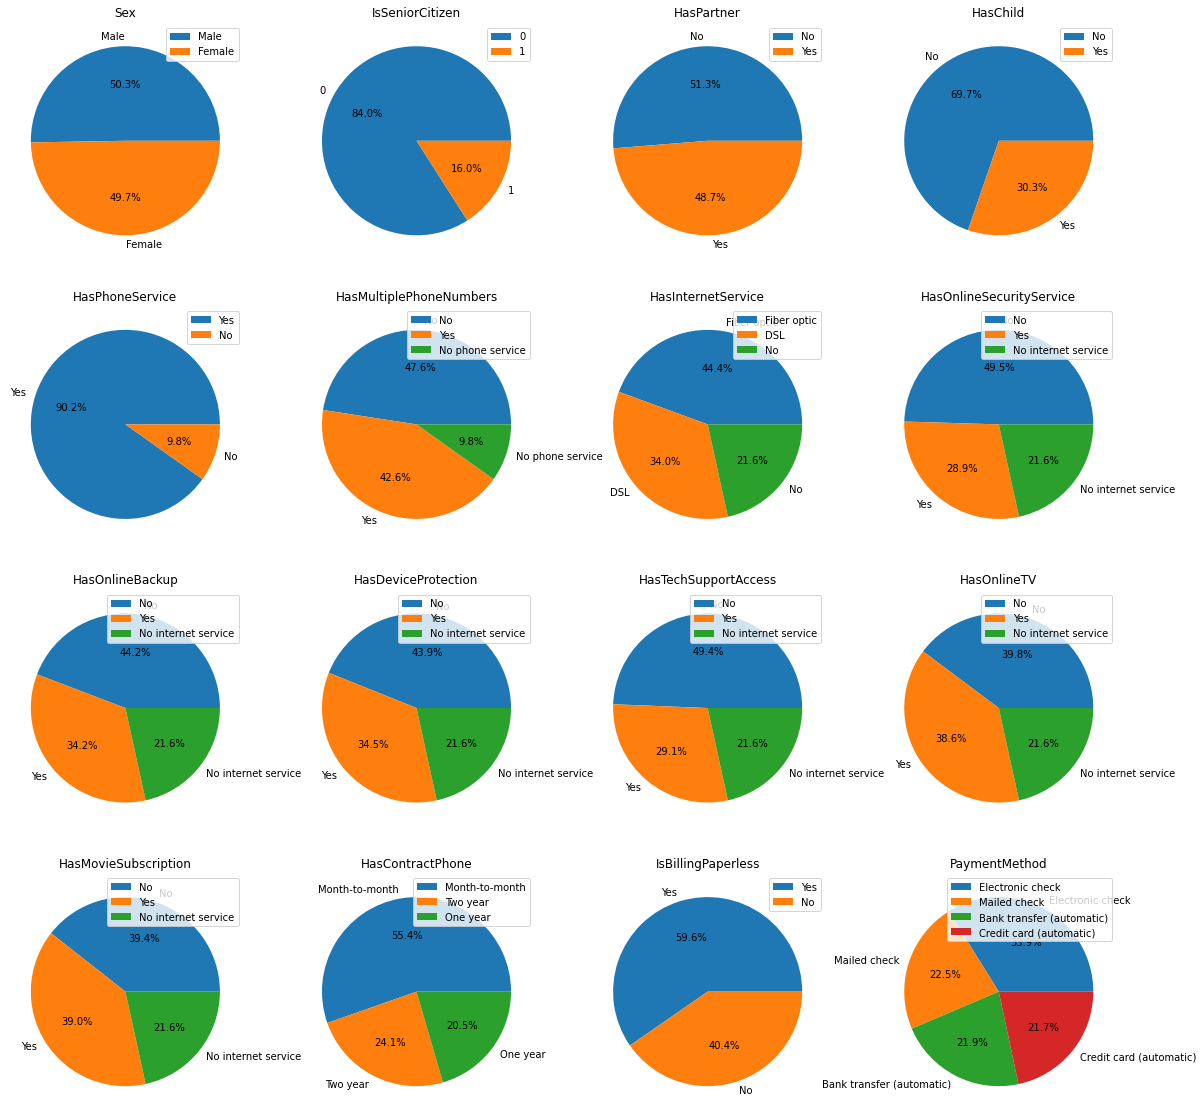

In [26]:
fig = plt.figure(figsize =(20, 20))
k=0
for col in cat_cols:
  val = data[col].value_counts()
  plt.subplot(4,4,k+1)
  plt.pie(val, labels = val.index, autopct='%1.1f%%')
  plt.legend()
  plt.title(col)
  k+=1

# Целевая переменная 

Text(0.5, 1.0, 'Churn')

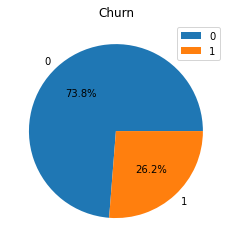

In [27]:
plt.pie(data[target_col].value_counts(), labels = data[target_col].value_counts().index, autopct='%1.1f%%')
plt.legend()
plt.title(target_col)

Как можно видеть, целевая переменная несбалансированна. Класса с меткой 0 почти в 3 раза больше чем класса с меткой 1

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [28]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [29]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Нормирую числовые признаки с помощью StandardScaler, категориальные признаки перевожу в one hot вектора с помощью get_dummies предварительно изменив тип значений столбца TotalSpent с object на float

In [30]:
std_scaler = StandardScaler()
data_num = pd.DataFrame(std_scaler.fit_transform(data[num_cols]), columns=data[num_cols].columns)
data_cat = pd.get_dummies(data[cat_cols],columns=cat_cols)
X = pd.concat([data_num, data_cat], axis=1)
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)
# YOUR CODE

In [31]:
classif = LogisticRegression()
param_grid = {'C': np.array([100, 10, 1, 0.1, 0.01, 0.001])}
search = GridSearchCV(classif, param_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')
search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)
print(search.best_estimator_)

{'C': 10.0}
0.8447821963519966
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
clsf = LogisticRegression(C=10.0)
clsf.fit(X_train, y_train)
pred=clsf.predict_proba(X_test)[:,1]
print(pred)
print('roc_auc_test:', roc_auc_score(y_test,pred))

[0.21869224 0.10208714 0.04319953 ... 0.26872538 0.36994353 0.2918818 ]
roc_auc_test: 0.8439915074309979


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

лучшее качество (на отложенной тестовой): 0.8439915074309979

параметры: 'C': 10.0

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [33]:
!pip install catboost
import catboost 
from catboost import CatBoostClassifier
X_cat = pd.concat([data_num,data[cat_cols]],axis=1)
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(data[num_cols+cat_cols].values, data[target_col].values, 
                                                    train_size=0.8,
                                                    random_state=42)
cat_cls = CatBoostClassifier()
cat_ind = [data.columns.get_loc(col) for col in cat_cols if col in data]
print(cat_ind)
cat_cls.fit(X_cat_train,y_cat_train,cat_features=cat_ind)
pred = cat_cls.predict_proba(X_cat_test)[:,1] 

# YOUR CODE

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Learning rate set to 0.019048
0:	learn: 0.6801499	total: 17.4ms	remaining: 17.4s
1:	learn: 0.6683861	total: 33.2ms	remaining: 16.6s
2:	learn: 0.6574055	total: 49.7ms	remaining: 16.5s
3:	learn: 0.6459140	total: 64.8ms	remaining: 16.1s
4:	learn: 0.6353605	total: 79ms	remaining: 15.7s
5:	learn: 0.6261610	total: 90.5ms	remaining: 15s
6:	learn: 0.6167841	total: 103ms	remaining: 14.6s
7:	learn: 0.6080311	total: 116ms	remaining: 14.4s
8:	learn: 0.5997483	total: 130ms	remaining: 14.3s
9:	learn: 0.5918432	total: 148ms	remaining: 14.7s
10:	learn: 0.5839242	total: 161ms	remaining: 14.5s
11:	learn: 0.5766678	total: 174ms	remaining: 14.3s
12:	learn: 0.5701751	total: 183ms	remaining: 13.9s
13:	learn: 0.5631203	total: 198ms	remaining: 13.9s
14:	learn: 0.5566815	total: 210ms	remaining: 13.8s
15:	learn: 0.5507060	total: 223ms	remaining: 13.7s
16:	learn: 0.5449043	total: 237ms	remaining: 13.7s
17:	learn: 0.5390888	total: 250ms	remaining: 13.6s
18

In [34]:
print('test_roc_auc_score на отложенной тестовой:', roc_auc_score(y_cat_test,pred))

test_roc_auc_score на отложенной тестовой: 0.8404411417787214


In [35]:
cat_cls_grid = CatBoostClassifier(cat_features=cat_ind)                                          
grid={'learning_rate': [0.1,0.01,0.2],
      'depth': [2, 4, 6],
      'l2_leaf_reg': [1, 3, 5, 7],
      'iterations' : [100, 200]}  
grid_search_result = cat_cls_grid.grid_search(grid, 
                           X_cat_train, 
                           y_cat_train, 
                           plot=True, refit=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
156:	learn: 0.3546046	test: 0.4097099	best: 0.4086023 (140)	total: 1.35s	remaining: 371ms
157:	learn: 0.3545309	test: 0.4097326	best: 0.4086023 (140)	total: 1.36s	remaining: 362ms
158:	learn: 0.3543286	test: 0.4103190	best: 0.4086023 (140)	total: 1.37s	remaining: 353ms
159:	learn: 0.3540489	test: 0.4104638	best: 0.4086023 (140)	total: 1.38s	remaining: 344ms
160:	learn: 0.3537254	test: 0.4105123	best: 0.4086023 (140)	total: 1.38s	remaining: 335ms
161:	learn: 0.3532514	test: 0.4111727	best: 0.4086023 (140)	total: 1.39s	remaining: 327ms
162:	learn: 0.3524967	test: 0.4114651	best: 0.4086023 (140)	total: 1.4s	remaining: 318ms
163:	learn: 0.3524810	test: 0.4114482	best: 0.4086023 (140)	total: 1.41s	remaining: 310ms
164:	learn: 0.3523439	test: 0.4116563	best: 0.4086023 (140)	total: 1.43s	remaining: 303ms
165:	learn: 0.3523154	test: 0.4116101	best: 0.4086023 (140)	total: 1.44s	remaining: 295ms
166:	learn: 0.3516212	test: 0.411

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [36]:
grid_search_result['params']

{'depth': 4, 'iterations': 200, 'l2_leaf_reg': 7, 'learning_rate': 0.1}

In [37]:
best_cat = CatBoostClassifier(iterations = 200, learning_rate = 0.1, depth = 4, l2_leaf_reg = 7, cat_features=cat_ind)
best_cat.fit(X_cat_train,y_cat_train)
pred=best_cat.predict_proba(X_cat_test)[:,1]
print('roc_auc with tuning на отложенной тестовой:', roc_auc_score(y_cat_test,pred))

0:	learn: 0.6435544	total: 9.43ms	remaining: 1.88s
1:	learn: 0.6037317	total: 18.8ms	remaining: 1.86s
2:	learn: 0.5658686	total: 28.1ms	remaining: 1.84s
3:	learn: 0.5360652	total: 35.6ms	remaining: 1.74s
4:	learn: 0.5141037	total: 42.2ms	remaining: 1.64s
5:	learn: 0.4946271	total: 50.6ms	remaining: 1.64s
6:	learn: 0.4796277	total: 60.3ms	remaining: 1.66s
7:	learn: 0.4704998	total: 66.8ms	remaining: 1.6s
8:	learn: 0.4624793	total: 74.7ms	remaining: 1.58s
9:	learn: 0.4546062	total: 81.9ms	remaining: 1.56s
10:	learn: 0.4485913	total: 89ms	remaining: 1.53s
11:	learn: 0.4430761	total: 99.5ms	remaining: 1.56s
12:	learn: 0.4387435	total: 106ms	remaining: 1.53s
13:	learn: 0.4348613	total: 115ms	remaining: 1.52s
14:	learn: 0.4322213	total: 122ms	remaining: 1.51s
15:	learn: 0.4295212	total: 128ms	remaining: 1.48s
16:	learn: 0.4269622	total: 136ms	remaining: 1.46s
17:	learn: 0.4245529	total: 144ms	remaining: 1.46s
18:	learn: 0.4235019	total: 150ms	remaining: 1.43s
19:	learn: 0.4228039	total: 155m

Catboost с дефолтными параметрами: 

качество на тесте: 0.8404411417787214

Catboost c настроенными параметрами: 

качество на тесте: 0.8425194621372964

параметры: {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 7, 'learning_rate': 0.1}

# Предсказания

In [38]:
best_model = best_cat
best_model.fit(X_cat_train,y_cat_train)
pred=best_model.predict_proba(X_cat_test)[:,1]
# какая-то предыдущая модель

0:	learn: 0.6435544	total: 9.55ms	remaining: 1.9s
1:	learn: 0.6037317	total: 18.7ms	remaining: 1.85s
2:	learn: 0.5658686	total: 28.2ms	remaining: 1.85s
3:	learn: 0.5360652	total: 35.9ms	remaining: 1.76s
4:	learn: 0.5141037	total: 43.8ms	remaining: 1.71s
5:	learn: 0.4946271	total: 52.5ms	remaining: 1.7s
6:	learn: 0.4796277	total: 60.7ms	remaining: 1.67s
7:	learn: 0.4704998	total: 67ms	remaining: 1.61s
8:	learn: 0.4624793	total: 74.8ms	remaining: 1.59s
9:	learn: 0.4546062	total: 81.9ms	remaining: 1.55s
10:	learn: 0.4485913	total: 89.1ms	remaining: 1.53s
11:	learn: 0.4430761	total: 99ms	remaining: 1.55s
12:	learn: 0.4387435	total: 107ms	remaining: 1.54s
13:	learn: 0.4348613	total: 115ms	remaining: 1.53s
14:	learn: 0.4322213	total: 123ms	remaining: 1.52s
15:	learn: 0.4295212	total: 130ms	remaining: 1.49s
16:	learn: 0.4269622	total: 138ms	remaining: 1.49s
17:	learn: 0.4245529	total: 146ms	remaining: 1.48s
18:	learn: 0.4235019	total: 153ms	remaining: 1.45s
19:	learn: 0.4228039	total: 157ms	r

In [39]:
X_test = pd.read_csv('./test.csv')
X_test = X_test.replace(' ', float('0'))
X_test['TotalSpent'] = X_test['TotalSpent'].astype(float)
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]

submission.to_csv('./my_submission1.csv', index=False)

Score на kaggle в таблице: 0.85204


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.